<a href="https://colab.research.google.com/github/entresing/Week-2_Data_Preprocessing/blob/week2_fixing_version/IAT481_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IAT481 Assignment 2

In [147]:
!python3 -m pip --version

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [148]:
# Get the critical imports out of the way
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os

# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')
from IPython.core.display import HTML
# Center matplotlib figures...
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

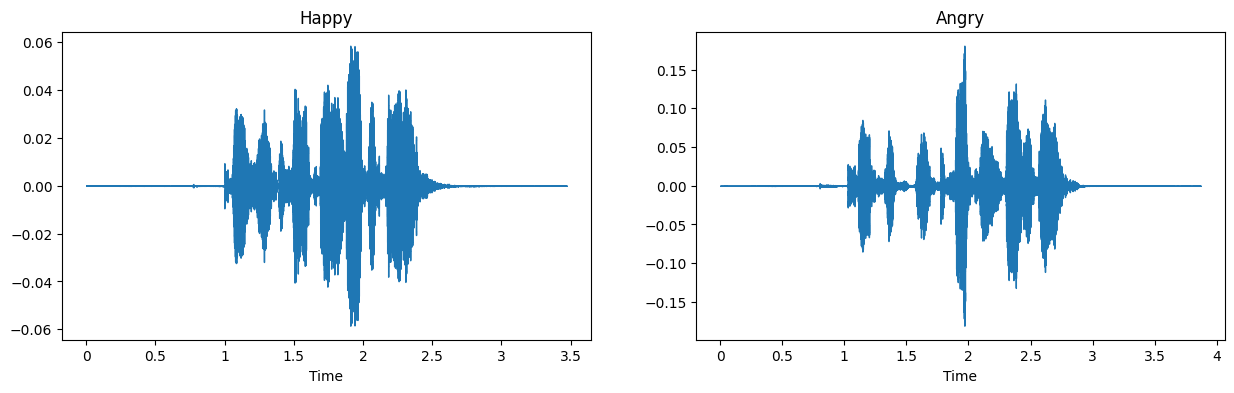

In [149]:
################# Load Happy and Angry example of Actor 1 #####################################
with soundfile.SoundFile('/content/drive/MyDrive/IAT481/RAVDESS/Actor_01/03-01-03-01-01-01-01.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Happy')

with soundfile.SoundFile('/content/drive/MyDrive/IAT481/RAVDESS/Actor_01/03-01-05-01-01-01-01.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Angry')

In [150]:
with soundfile.SoundFile('/content/drive/MyDrive/IAT481/RAVDESS/Actor_01/03-01-03-01-01-01-01.wav') as audio:
    happy_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate

with soundfile.SoundFile('/content/drive/MyDrive/IAT481/RAVDESS/Actor_01/03-01-05-01-01-01-01.wav') as audio:
    angry_waveform = audio.read(dtype="float32")
    # same sample rate

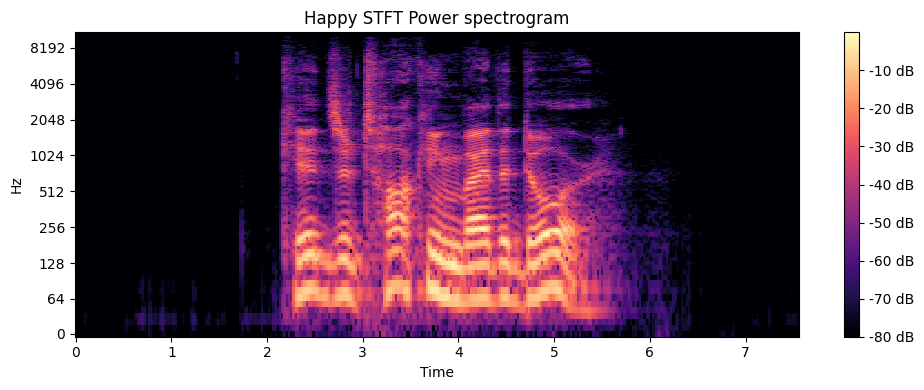

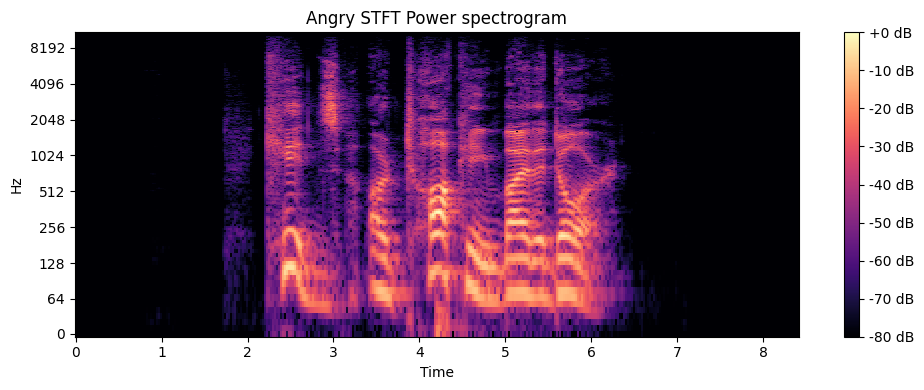

In [151]:
stft_spectrum_matrix = librosa.stft(happy_waveform)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('Happy STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

stft_spectrum_matrix = librosa.stft(angry_waveform)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('Angry STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

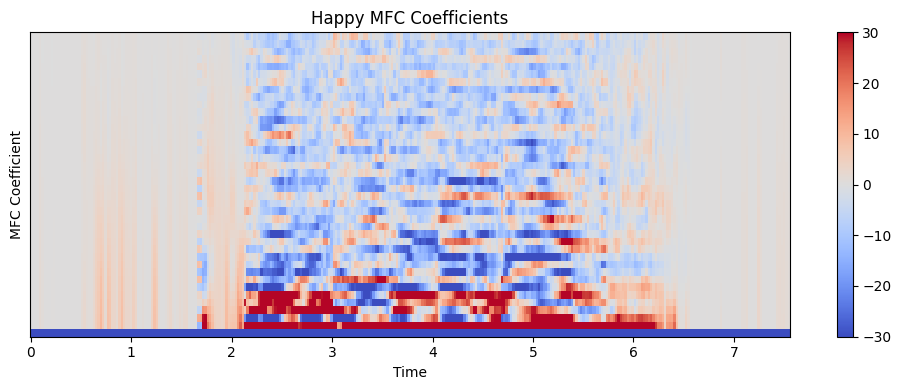

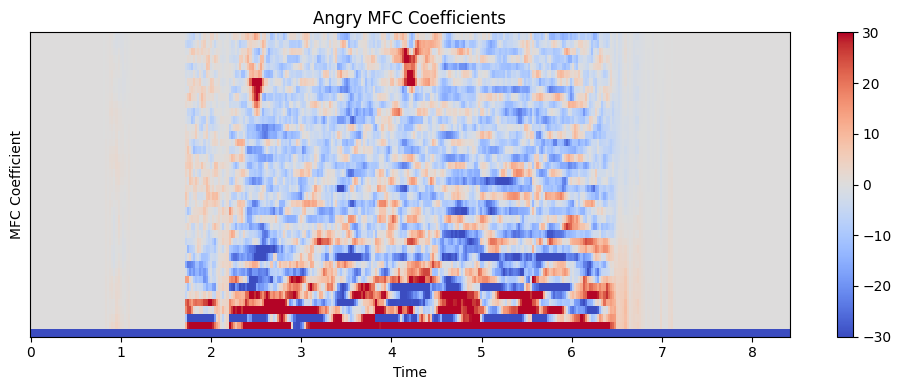

In [152]:
from matplotlib.colors import Normalize
mfc_coefficients = librosa.feature.mfcc(y=happy_waveform, sr=sample_rate, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('Happy MFC Coefficients')
plt.tight_layout()

mfc_coefficients = librosa.feature.mfcc(y=angry_waveform, sr=sample_rate, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('Angry MFC Coefficients')
plt.tight_layout()

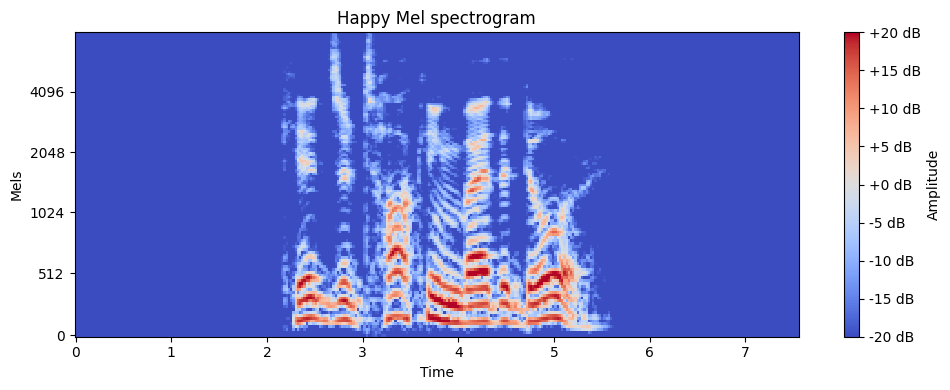

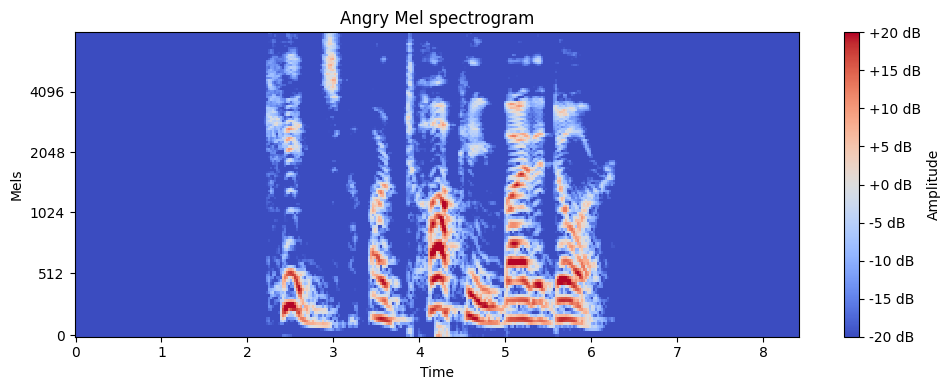

In [153]:
melspectrogram = librosa.feature.melspectrogram(y=happy_waveform, sr=sample_rate, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),y_axis='mel',fmax=8000, x_axis='time', norm=Normalize(vmin=-20,vmax=20))
plt.colorbar(format='%+2.0f dB',label='Amplitude')
plt.ylabel('Mels')
plt.title('Happy Mel spectrogram')
plt.tight_layout()

melspectrogram = librosa.feature.melspectrogram(y=angry_waveform, sr=sample_rate, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),y_axis='mel',fmax=8000, x_axis='time', norm=Normalize(vmin=-20,vmax=20))
plt.colorbar(format='%+2.0f dB',label='Amplitude')
plt.ylabel('Mels')
plt.title('Angry Mel spectrogram')
plt.tight_layout()

## Feature Exatraction Testing

In [154]:
import librosa

def feature_chromagram(waveform, sample_rate):
    # STFT computed here explicitly; mel spectrogram and MFCC functions do this under the hood
    stft_spectrogram=np.abs(librosa.stft(waveform))
    #print(stft_spectrogram.shape)
    # Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    #print(chromagram.shape)
    return chromagram

def feature_melspectrogram(waveform, sample_rate):
    # Produce the mel spectrogram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # Using 8khz as upper frequency bound should be enough for most speech classification tasks
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000).T,axis=0)
    return melspectrogram

def feature_mfcc(waveform, sample_rate):
    # Compute the MFCCs for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # 40 filterbanks = 40 coefficients
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfc_coefficients

In [155]:
def get_features(file):
    # load an individual soundfile
     with soundfile.SoundFile(file) as audio:
        waveform = audio.read(dtype="float32")
        sample_rate = audio.samplerate
        # compute features of soundfile
        chromagram = feature_chromagram(waveform, sample_rate)
        melspectrogram = feature_melspectrogram(waveform, sample_rate)
        mfc_coefficients = feature_mfcc(waveform, sample_rate)
        feature_matrix=np.array([])

        # use np.hstack to stack our feature arrays horizontally to create a feature matrix
        feature_matrix = np.hstack((chromagram, melspectrogram, mfc_coefficients))

        return feature_matrix

## Load the Dataset and Compute Features

In [156]:
#Emotions in the RAVDESS dataset
emotions_ravdess ={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

Letter stands for germany:

*   A	anger	W	Ärger (Wut)
*   B	boredom	L	Langeweile
*   D	disgust	E	Ekel
*   F	anxiety/fear	A	Angst
*   H	happiness	F	Freude
*   S	sadness	T	Trauer
*   N = neutral version




In [157]:
#Emotions in the EMODB dataset
emotions_emodb ={
  'N':'neutral',
  'F':'happy',
  'T':'sad',
  'W':'angry',
  'A':'fearful',
  'E':'disgust',
  'L':'boredom'
}

In [158]:
def load_data_ravdess():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/IAT481/RAVDES/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        #print(file_name)
        #print(file_name.split("-")[2])
        emotion_ravdess=emotions_ravdess[(file_name.split("-")[2])]
        #print(emotion)
        features_ravdess = get_features(file)
        X.append(features_ravdess)
        y.append(emotion_ravdess)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{1435} audio samples',end=' ')
      # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)

In [159]:


def load_data_emodb():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/IAT481/EMODB/*.wav"):
        file_name=os.path.basename(file)
        #print(file_name)
        #print(file_name.split("-")[2])
        emotion_emodb=emotions_emodb[list(file_name)[-6]]
        print(emotion_emodb)
        features_emodb = get_features(file)
        X.append(features_emodb)
        y.append(emotion_emodb)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{1435} audio samples',end=' ')
      # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)

In [160]:
word = "hellopeopLe"

list(word)[-2]


'L'

In [161]:
features_ravdess, emotions_ravdess = load_data_ravdess()

 Processed 1435/1435 audio samples 

In [162]:
features_emodb, emotions_emodb = load_data_emodb()

neutral
 Processed 1/1435 audio samples happy
 Processed 2/1435 audio samples angry
 Processed 3/1435 audio samples neutral
 Processed 4/1435 audio samples sad
 Processed 5/1435 audio samples happy
 Processed 6/1435 audio samples angry
 Processed 7/1435 audio samples boredom
 Processed 8/1435 audio samples angry
 Processed 9/1435 audio samples boredom
 Processed 10/1435 audio samples angry
 Processed 11/1435 audio samples boredom
 Processed 12/1435 audio samples angry
 Processed 13/1435 audio samples neutral
 Processed 14/1435 audio samples boredom
 Processed 15/1435 audio samples angry
 Processed 16/1435 audio samples boredom
 Processed 17/1435 audio samples neutral
 Processed 18/1435 audio samples neutral
 Processed 19/1435 audio samples boredom
 Processed 20/1435 audio samples angry
 Processed 21/1435 audio samples happy
 Processed 22/1435 audio samples happy
 Processed 23/1435 audio samples angry
 Processed 24/1435 audio samples neutral
 Processed 25/1435 audio samples fearful
 Pro

In [163]:
print(f'\nAudio samples represented: {features_ravdess.shape[0]}')
print(f'Numerical features extracted per sample: {features_ravdess.shape[1]}')
features_df = pd.DataFrame(features_ravdess) # make it pretty for display
features_df


Audio samples represented: 1435
Numerical features extracted per sample: 180


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.628023,0.596604,0.643935,0.655228,0.659819,0.725635,0.808151,0.814369,0.771093,0.722508,...,-1.125915,0.213711,-1.729092,0.776150,0.564957,2.507703,0.997836,0.844502,-0.108339,2.037053
1,0.697806,0.658317,0.614802,0.639169,0.717383,0.743908,0.781170,0.749796,0.722322,0.715267,...,-1.211285,0.060299,-1.140080,0.446976,0.614657,0.430341,0.332445,-0.197219,0.797524,2.606972
2,0.630671,0.620980,0.574323,0.549653,0.552371,0.581956,0.609453,0.656941,0.674351,0.638954,...,6.583359,6.137162,4.016740,3.834329,4.922863,1.931367,1.671281,2.565065,1.720630,3.102470
3,0.664177,0.633587,0.590743,0.601933,0.623831,0.643299,0.671203,0.668196,0.683204,0.658824,...,5.234397,5.000974,4.120271,3.053776,2.119890,2.965643,2.442994,2.014850,3.167833,4.008449
4,0.493344,0.468308,0.472621,0.484694,0.531912,0.626702,0.712453,0.772570,0.750475,0.679810,...,-0.068701,-0.550281,-0.108486,-0.365814,1.130019,2.327888,1.535465,1.427768,3.451788,3.993429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,0.672768,0.601451,0.548317,0.477806,0.453192,0.516665,0.570100,0.599750,0.647746,0.692148,...,0.283253,0.218117,-1.928166,-2.486516,-0.530147,0.354905,0.463640,0.581006,-2.091462,-1.899596
1431,0.550732,0.508484,0.466810,0.438485,0.428218,0.445352,0.444528,0.444478,0.500419,0.551673,...,2.333152,3.619088,0.793563,0.743431,0.660723,-0.254914,-0.967536,0.378564,-0.338074,-0.463241
1432,0.602309,0.605448,0.558788,0.529441,0.546190,0.568049,0.566027,0.523464,0.526789,0.552809,...,2.176564,3.904047,0.980935,1.160923,-0.694902,-0.969963,-0.234802,0.941700,0.695973,0.430566
1433,0.624706,0.580080,0.570375,0.606112,0.657162,0.664474,0.650652,0.662815,0.675567,0.646462,...,-4.649134,-3.754596,-3.451878,-3.142278,-4.471058,-2.261098,-2.255610,-0.477217,1.186477,1.948838


In [164]:
print(f'\nAudio samples represented: {features_emodb.shape[0]}')
print(f'Numerical features extracted per sample: {features_emodb.shape[1]}')
features_df1 = pd.DataFrame(features_emodb) # make it pretty for display
features_df1


Audio samples represented: 535
Numerical features extracted per sample: 180


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.720641,0.720583,0.617265,0.595652,0.606965,0.608982,0.657078,0.695031,0.698287,0.615263,...,-1.645359,-2.420688,-2.502800,-3.199016,-2.187031,-3.741765,-2.143440,-2.468618,-1.887268,-2.429971
1,0.551519,0.497329,0.518016,0.575646,0.631912,0.685601,0.644916,0.632489,0.635610,0.675823,...,1.244440,2.327929,-0.604428,3.734100,1.145658,3.809346,3.586081,2.798714,2.782396,1.144741
2,0.564311,0.610758,0.603587,0.677393,0.742133,0.746390,0.661647,0.631888,0.586567,0.574034,...,3.288302,5.465301,4.083700,7.782571,5.437660,4.327275,3.230336,4.754009,2.528433,1.852483
3,0.607800,0.584315,0.631464,0.691069,0.665198,0.668158,0.644499,0.628710,0.646426,0.635522,...,-3.324037,-1.364126,-2.830347,-1.963026,-1.468808,-1.079737,-0.682392,-1.925796,-0.824300,-1.035421
4,0.596133,0.637498,0.634938,0.684940,0.706530,0.701318,0.729132,0.706555,0.696758,0.719856,...,-2.887378,-0.256546,0.757951,-1.229370,-2.373523,-0.323926,-2.219131,-1.226307,-0.720164,-2.720255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.548394,0.616139,0.657003,0.569550,0.448954,0.491863,0.597981,0.627743,0.600697,0.532020,...,3.998015,3.713843,0.759450,1.963719,-1.669443,-1.020634,-1.388461,0.810363,-0.356627,0.859328
531,0.397729,0.381754,0.457772,0.492669,0.513447,0.504536,0.540392,0.596434,0.622308,0.542981,...,2.577474,5.679612,2.823710,5.859095,1.926470,2.373386,3.502092,5.980397,4.983805,5.294659
532,0.540154,0.584809,0.557785,0.580751,0.616577,0.663103,0.622502,0.587237,0.579877,0.547858,...,-0.528771,2.157772,3.874768,2.852645,0.567858,-1.174558,0.615541,0.314588,-0.031270,-2.331858
533,0.587564,0.552499,0.564091,0.588127,0.633833,0.669148,0.581015,0.532040,0.589172,0.622009,...,0.426126,-0.976669,0.773127,2.585343,1.878905,-0.342683,1.896097,3.136783,2.886128,-2.405096


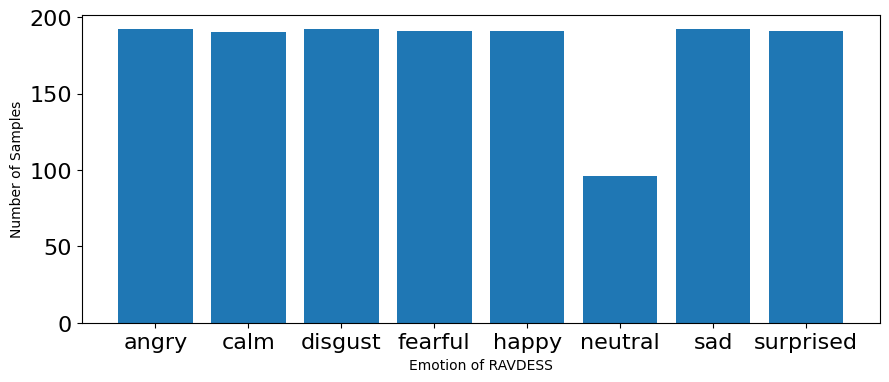

In [165]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(emotions_ravdess, return_counts=True)
plt.bar(x=range(8), height=count)
plt.xticks(ticks=range(8), labels = [emotion_ravdess for emotion_ravdess in emotion_list],fontsize=10)
plt.xlabel('Emotion of RAVDESS')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

Under the EmoDB dataset, in comparison with RAVDESS, it misses one category such as "calm". The solution that I made was to reduce the bar range and ticks from 8 to 7. After realizing some catagories doesn't matching the other, for example, the "boredom" versu "surprised",

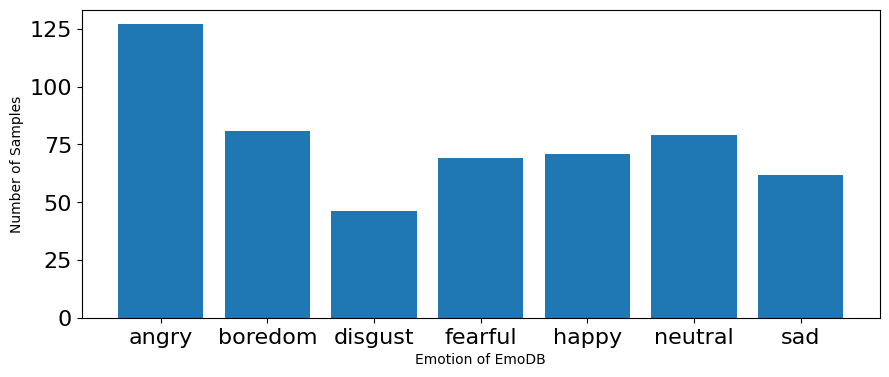

In [166]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
emotion_list2, count = np.unique(emotions_emodb, return_counts=True)
plt.bar(x=range(7), height=count)
plt.xticks(ticks=range(7), labels = [emotion_emodb for emotion_emodb in emotion_list2],fontsize=10)
plt.xlabel('Emotion of EmoDB')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

## Combining emotion's data

### Concatenate method

Trying different method on combining the dataset. Concatenate method only works for one dimensional data (If I am not wrong) it only concatenate the emotion data but not the entire dataset.

In [167]:
# Concatenate the two datasets vertically
emotions_all= np.concatenate((emotions_ravdess, emotions_emodb))

# Print the concatenated dataset
print(emotions_all)

['calm' 'happy' 'sad' ... 'happy' 'angry' 'angry']


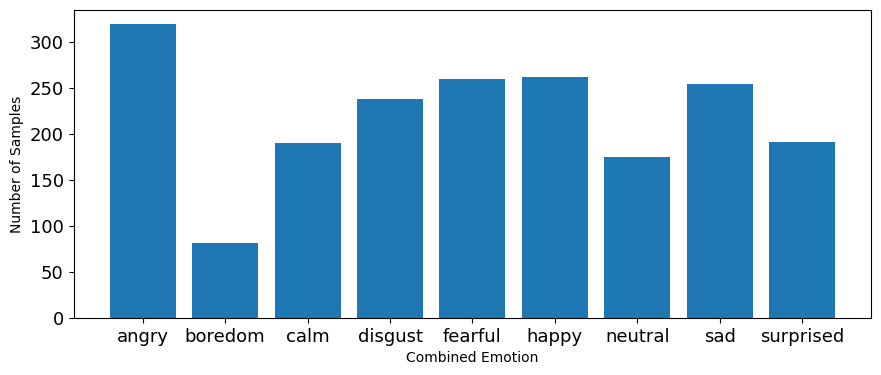

In [168]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
emotion_list3, count = np.unique(emotions_all, return_counts=True)
plt.bar(x=range(9), height=count)
plt.xticks(ticks=range(9), labels = [emotion_emodb for emotion_emodb in emotion_list3],fontsize=8)
plt.xlabel('Combined Emotion')
plt.tick_params(labelsize=13)
plt.ylabel('Number of Samples')
plt.show()

### Vstack method

In [169]:
def combine_datasets():

    # Vertically stack features from both datasets
    combined_features = np.vstack((features_ravdess, features_emodb))
    # Concatenate emotions from both datasets
    combined_emotions = np.concatenate((emotions_ravdess, emotions_emodb))

    return combined_features, combined_emotions


In [170]:
combined_features, combined_emotions = combine_datasets()

### Verify the vertical stacked data to ensure if it combined:

In [171]:
# Print shapes to verify
print(f'Combined features shape: {combined_features.shape}')
print(f'Combined emotions shape: {combined_emotions.shape}')

Combined features shape: (1970, 180)
Combined emotions shape: (1970,)


In [172]:
print(f'\nAudio samples represented: {combined_features.shape[0]}')
print(f'Numerical features extracted per sample: {combined_features.shape[1]}')
features_df = pd.DataFrame(combined_features) # make it pretty for display
features_df


Audio samples represented: 1970
Numerical features extracted per sample: 180


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.628023,0.596604,0.643935,0.655228,0.659819,0.725635,0.808151,0.814369,0.771093,0.722508,...,-1.125915,0.213711,-1.729092,0.776150,0.564957,2.507703,0.997836,0.844502,-0.108339,2.037053
1,0.697806,0.658317,0.614802,0.639169,0.717383,0.743908,0.781170,0.749796,0.722322,0.715267,...,-1.211285,0.060299,-1.140080,0.446976,0.614657,0.430341,0.332445,-0.197219,0.797524,2.606972
2,0.630671,0.620980,0.574323,0.549653,0.552371,0.581956,0.609453,0.656941,0.674351,0.638954,...,6.583359,6.137162,4.016740,3.834329,4.922863,1.931367,1.671281,2.565065,1.720630,3.102470
3,0.664177,0.633587,0.590743,0.601933,0.623831,0.643299,0.671203,0.668196,0.683204,0.658824,...,5.234397,5.000974,4.120271,3.053776,2.119890,2.965643,2.442994,2.014850,3.167833,4.008449
4,0.493344,0.468308,0.472621,0.484694,0.531912,0.626702,0.712453,0.772570,0.750475,0.679810,...,-0.068701,-0.550281,-0.108486,-0.365814,1.130019,2.327888,1.535465,1.427768,3.451788,3.993429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,0.548394,0.616139,0.657003,0.569550,0.448954,0.491863,0.597981,0.627743,0.600697,0.532020,...,3.998015,3.713843,0.759450,1.963719,-1.669443,-1.020634,-1.388461,0.810363,-0.356627,0.859328
1966,0.397729,0.381754,0.457772,0.492669,0.513447,0.504536,0.540392,0.596434,0.622308,0.542981,...,2.577474,5.679612,2.823710,5.859095,1.926470,2.373386,3.502092,5.980397,4.983805,5.294659
1967,0.540154,0.584809,0.557785,0.580751,0.616577,0.663103,0.622502,0.587237,0.579877,0.547858,...,-0.528771,2.157772,3.874768,2.852645,0.567858,-1.174558,0.615541,0.314588,-0.031270,-2.331858
1968,0.587564,0.552499,0.564091,0.588127,0.633833,0.669148,0.581015,0.532040,0.589172,0.622009,...,0.426126,-0.976669,0.773127,2.585343,1.878905,-0.342683,1.896097,3.136783,2.886128,-2.405096


### Print combined emotions:

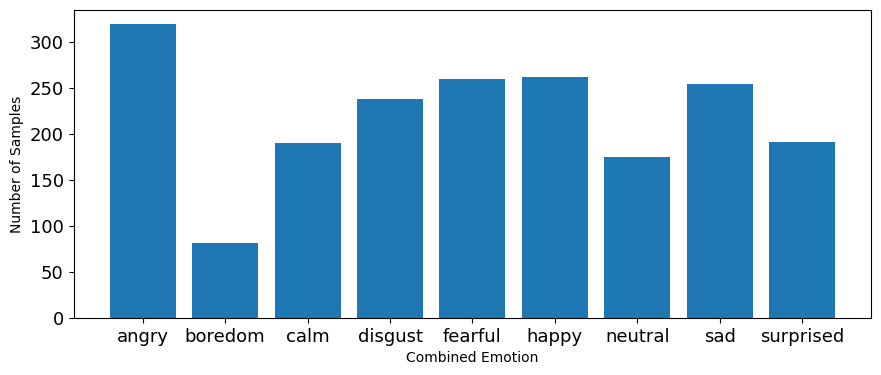

In [173]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
#print graph of combined_emotions
emotion_list3, count = np.unique(combined_emotions, return_counts=True)
plt.bar(x=range(9), height=count)
plt.xticks(ticks=range(9), labels = [emotion_emodb for emotion_emodb in emotion_list3],fontsize=8)
plt.xlabel('Combined Emotion')
plt.tick_params(labelsize=13)
plt.ylabel('Number of Samples')
plt.show()

### Handling mismatches catagories:

Instead of combining the mismatching emotions, I decided to remove them from the dataset.

The approach I made is to filter out what to keep via numpy where. It filters out emotions that are 'calm', 'surprised', and 'boredom' and removes them by only keeping the rest of the data to filtered_datas.

[Source] ChatGPT prompt: how to take away mismatches categories from a combined dataset?

In [174]:
# combined_features, combined_emotions are as obtained from the combine_datasets function

# Find indices of samples that are not 'calm' or 'boredom'
indices_to_keep = np.where((combined_emotions != 'calm') & (combined_emotions != 'boredom')
& (combined_emotions != 'surprised'))[0]

# Filter both features and emotions arrays
filtered_features = combined_features[indices_to_keep]
filtered_emotions = combined_emotions[indices_to_keep]

print(f'Filtered features shape: {filtered_features.shape}')
print(f'Filtered emotions shape: {filtered_emotions.shape}')


Filtered features shape: (1508, 180)
Filtered emotions shape: (1508,)


In [175]:
filtered_features


array([[ 0.6978057 ,  0.6583166 ,  0.61480224, ..., -0.19721942,
         0.79752374,  2.6069717 ],
       [ 0.63067144,  0.62097955,  0.5743235 , ...,  2.5650651 ,
         1.7206298 ,  3.1024704 ],
       [ 0.6641768 ,  0.633587  ,  0.59074336, ...,  2.01485   ,
         3.1678329 ,  4.008449  ],
       ...,
       [ 0.540154  ,  0.5848086 ,  0.55778503, ...,  0.3145878 ,
        -0.0312697 , -2.3318582 ],
       [ 0.5875644 ,  0.55249935,  0.5640914 , ...,  3.136783  ,
         2.8861282 , -2.4050963 ],
       [ 0.5387908 ,  0.50911963,  0.57909787, ...,  5.940713  ,
         4.5076413 ,  5.291978  ]], dtype=float32)

Now it only kept the remaining 1509 features that exclude 'calm', 'surprise', and 'boredom'.

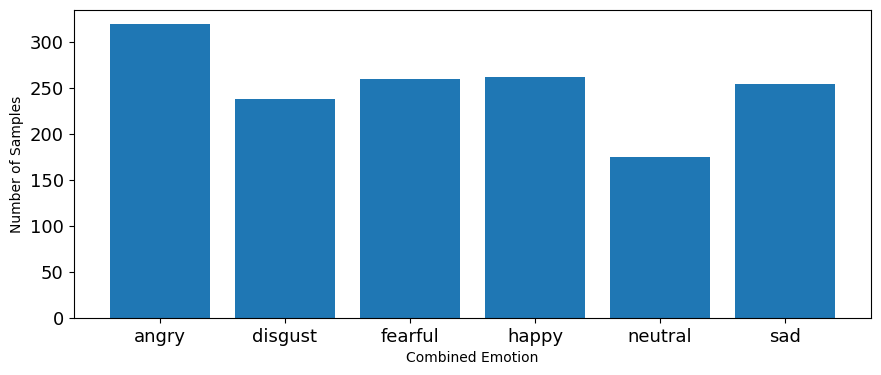

In [176]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
#print graph of combined_emotions
emotion_list3, count = np.unique(filtered_emotions, return_counts=True)
plt.bar(x=range(6), height=count)
plt.xticks(ticks=range(6), labels = [emotion_emodb for emotion_emodb in emotion_list3],fontsize=8)
plt.xlabel('Combined Emotion')
plt.tick_params(labelsize=13)
plt.ylabel('Number of Samples')
plt.show()

In the combined emotion's dataset, Angry samples are slightly above other samples. Neutral, on the other hand, is below the average samples. Possible impact would be the accuracy of the model using this dataset, because each samples is not even out. Especially, the 'angry' and 'neutral'.

I was having fun playing the dataset with chatGPT, so I asked him ways of cleaning the data. And here is what I got from finding missing values and duplicate values:

In [197]:
print(f'\nAudio samples represented: {filtered_features.shape[0]}')
print(f'Numerical features extracted per sample: {filtered_features.shape[1]}')
features_df = pd.DataFrame(filtered_features) # make it pretty for display


#making dataframe for emotions as well
emotions_df = pd.DataFrame(filtered_emotions) # make it pretty for display

features_df


Audio samples represented: 1508
Numerical features extracted per sample: 180


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.697806,0.658317,0.614802,0.639169,0.717383,0.743908,0.781170,0.749796,0.722322,0.715267,...,-1.211285,0.060299,-1.140080,0.446976,0.614657,0.430341,0.332445,-0.197219,0.797524,2.606972
1,0.630671,0.620980,0.574323,0.549653,0.552371,0.581956,0.609453,0.656941,0.674351,0.638954,...,6.583359,6.137162,4.016740,3.834329,4.922863,1.931367,1.671281,2.565065,1.720630,3.102470
2,0.664177,0.633587,0.590743,0.601933,0.623831,0.643299,0.671203,0.668196,0.683204,0.658824,...,5.234397,5.000974,4.120271,3.053776,2.119890,2.965643,2.442994,2.014850,3.167833,4.008449
3,0.493344,0.468308,0.472621,0.484694,0.531912,0.626702,0.712453,0.772570,0.750475,0.679810,...,-0.068701,-0.550281,-0.108486,-0.365814,1.130019,2.327888,1.535465,1.427768,3.451788,3.993429
4,0.683258,0.688949,0.680515,0.731700,0.743100,0.741819,0.737601,0.713618,0.727781,0.687612,...,-1.755530,-2.066700,-1.284155,-0.009055,-1.856351,0.248031,-0.004867,1.532468,3.641724,4.462638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,0.548394,0.616139,0.657003,0.569550,0.448954,0.491863,0.597981,0.627743,0.600697,0.532020,...,3.998015,3.713843,0.759450,1.963719,-1.669443,-1.020634,-1.388461,0.810363,-0.356627,0.859328
1504,0.397729,0.381754,0.457772,0.492669,0.513447,0.504536,0.540392,0.596434,0.622308,0.542981,...,2.577474,5.679612,2.823710,5.859095,1.926470,2.373386,3.502092,5.980397,4.983805,5.294659
1505,0.540154,0.584809,0.557785,0.580751,0.616577,0.663103,0.622502,0.587237,0.579877,0.547858,...,-0.528771,2.157772,3.874768,2.852645,0.567858,-1.174558,0.615541,0.314588,-0.031270,-2.331858
1506,0.587564,0.552499,0.564091,0.588127,0.633833,0.669148,0.581015,0.532040,0.589172,0.622009,...,0.426126,-0.976669,0.773127,2.585343,1.878905,-0.342683,1.896097,3.136783,2.886128,-2.405096


In [180]:
features_df.to_excel('/content/drive/MyDrive/featuresCombined.xlsx')
emotions_df.to_excel('/content/drive/MyDrive/emotionsCombined.xlsx')

In [181]:
features=pd.read_excel('/content/drive/MyDrive/featuresRavdess.xlsx',index_col=0)
emotions=pd.read_excel('/content/drive/MyDrive/emotionsRavdess.xlsx',index_col=0)

### Feature scaling:

In [182]:
# We would usually use df.describe(), but it provides a bit of a mess of information we don't need at the moment.
def print_features(df):
    # Check chromagram feature values
    features_df_chromagram = df.loc[:,:11]
    chroma_min = features_df_chromagram.min().min()
    chroma_max = features_df_chromagram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    chroma_mean = features_df_chromagram.stack().mean()
    chroma_stdev = features_df_chromagram.stack().std()
    print(f'12 Chromagram features:       \
    min = {chroma_min:.3f}, \
    max = {chroma_max:.3f}, \
    mean = {chroma_mean:.3f}, \
    deviation = {chroma_stdev:.3f}')

    # Check mel spectrogram feature values
    features_df_melspectrogram = df.loc[:,12:139]
    mel_min = features_df_melspectrogram.min().min()
    mel_max = features_df_melspectrogram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mel_mean = features_df_melspectrogram.stack().mean()
    mel_stdev = features_df_melspectrogram.stack().std()
    print(f'\n128 Mel Spectrogram features: \
    min = {mel_min:.3f}, \
    max = {mel_max:.3f}, \
    mean = {mel_mean:.3f}, \
    deviation = {mel_stdev:.3f}')

    # Check MFCC feature values
    features_df_mfcc = df.loc[:,140:179]
    mfcc_min = features_df_mfcc.min().min()
    mfcc_max = features_df_mfcc.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mfcc_mean = features_df_mfcc.stack().mean()
    mfcc_stdev = features_df_mfcc.stack().std()
    print(f'\n40 MFCC features:             \
    min = {mfcc_min:.3f},\
    max = {mfcc_max:.3f},\
    mean = {mfcc_mean:.3f},\
    deviation = {mfcc_stdev:.3f}')

print_features(features_df)

12 Chromagram features:           min = 0.276,     max = 0.888,     mean = 0.640,     deviation = 0.093

128 Mel Spectrogram features:     min = 0.000,     max = 886.647,     mean = 1.328,     deviation = 9.748

40 MFCC features:                 min = -863.639,    max = 121.174,    mean = -11.163,    deviation = 82.575


In [183]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
features_scaled = filtered_features
features_scaled = scaler.fit_transform(features_scaled)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
features_minmax = filtered_features
features_minmax = scaler.fit_transform(features_minmax)

In [184]:
print('\033[1m'+'Standard Scaling:\n'+'\033[0m')
features_scaled_df = pd.DataFrame(features_scaled)
print_features(features_scaled_df)

print('\n\n\033[1m'+'MinMax Scaling:\n'+'\033[0m')
features_minmax_df = pd.DataFrame(features_minmax)
print_features(features_minmax_df)

Standard Scaling:

12 Chromagram features:           min = -4.046,     max = 2.602,     mean = -0.000,     deviation = 1.000

128 Mel Spectrogram features:     min = -0.475,     max = 33.092,     mean = -0.000,     deviation = 1.000

40 MFCC features:                 min = -4.719,    max = 6.582,    mean = -0.000,    deviation = 1.000


MinMax Scaling:

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.599,     deviation = 0.179

128 Mel Spectrogram features:     min = 0.000,     max = 1.000,     mean = 0.024,     deviation = 0.068

40 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.393,    deviation = 0.177


## Gender distributions

### RAVDESS Gender distributions:

Filename identifiers

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

* Vocal channel (01 = speech, 02 = song).

* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

* Repetition (01 = 1st repetition, 02 = 2nd repetition).

* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [185]:
#gender in the RAVDESS dataset
genders_ravdess ={
  '01':'male',
  '02':'female',
  '03':'male',
  '04':'female',
  '05':'male',
  '06':'female',
  '07':'male',
  '08':'female',
  '09':'male',
  '10':'female',
  '11':'male',
  '12':'female',
  '13':'male',
  '14':'female',
  '15':'male',
  '16':'female',
  '17':'male',
  '18':'female',
  '19':'male',
  '20':'female',
  '21':'male',
  '22':'female',
  '23':'male',
  '24':'female'
}

Instead of using the dictionary, I choose a better way to identify gender via modulus %. If there is no reminder, it's male. If there is a reminder, it's female.

One of the problems that I encountered was when the file was processed to 313/1435, it appeared to be an error saying the invalid literal for int() with base 10: '10 (1)'.

I assumed it was a duplicate file. Thus, I did a file search.

I checked all the files and cannot locate any of them that have 10(1) at the end of their file name. Therefore, I ask chatGPT to solve my problem.

[Source] chatGPT prompt:

* features_ravdess, gender_ravdess = load_data_ravdess_gender()

* output:

* ValueError: invalid literal for int() with base 10: '10 (1)'

In [186]:
def load_data_ravdess_gender():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/IAT481/RAVDESS/Actor_*/*.wav"):
        file_name = os.path.basename(file)
        # Attempt to extract the actor number more robustly
        actor_number_str = file_name.split("-")[-1].split(".")[0]
        # Filter out non-digit characters to ensure a valid integer conversion
        actor_number_str = ''.join(filter(str.isdigit, actor_number_str))
        if actor_number_str:  # Ensure string is not empty
            actor_number = int(actor_number_str)
            # Determine gender based on the actor number
            gender = 'male' if actor_number % 2 != 0 else 'female'
            features = get_features(file)
            X.append(features)
            y.append(gender)
            count += 1
            print('\r' + f'Processed {count}/{1435} audio samples', end=' ')
        else:
            print(f"\nWarning: Could not determine actor number from file name '{file_name}'. Skipping.")
    return np.array(X), np.array(y)

In [187]:
features_ravdess, gender_ravdess = load_data_ravdess_gender()

Processed 1437/1435 audio samples 

Display RAVDESS gender distribution in bar chart:

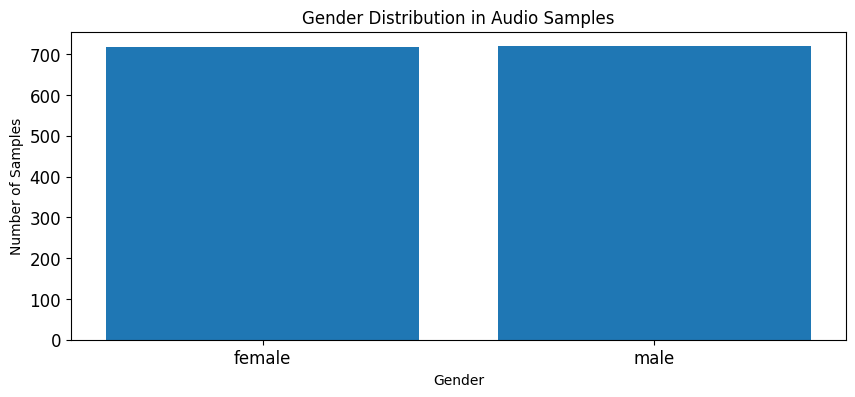

In [188]:
# Calculate unique genders and their counts
gender_list, gender_count = np.unique(gender_ravdess, return_counts=True)

# Plot gender distribution
plt.figure(figsize=(10, 4))  # Adjusted figure size for clarity
plt.bar(x=range(len(gender_list)), height=gender_count)
plt.xticks(ticks=range(len(gender_list)), labels=gender_list, fontsize=12)
plt.xlabel('Gender')
plt.tick_params(labelsize=12)
plt.ylabel('Number of Samples')
plt.title('Gender Distribution in Audio Samples')
plt.show()

### EmoDB Gender distributions:

Information about the speakers
* 03 - male, 31 years old
* 08 - female, 34 years
* 09 - female, 21 years
* 10 - male, 32 years
* 11 - male, 26 years
* 12 - male, 30 years
* 13 - female, 32 years
* 14 - female, 35 years
* 15 - male, 25 years
* 16 - female, 31 years

In [189]:
#gender in the EmoDB dataset
genders_emodb = {
  '03':'male',
  '08':'female',
  '09':'female',
  '10':'male',
  '11':'male',
  '12':'male',
  '13':'female',
  '14':'female',
  '15':'male',
  '16':'female'
}

In [190]:
def load_data_emodb_gender():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/IAT481/EMODB/*.wav"):
        file_name=os.path.basename(file)
        #print(file_name)
        #print(file_name.split("-")[2])
        gender_emodb=genders_emodb[(file_name[:2])]
        #print(emotion)
        features = get_features(file)
        X.append(features)
        y.append(gender_emodb)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{1435} audio samples',end=' ')
      # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)

In [191]:
features_emodb, gender_emodb = load_data_emodb_gender()

 Processed 535/1435 audio samples 

Display EmoDB gender distribution in bar chart:

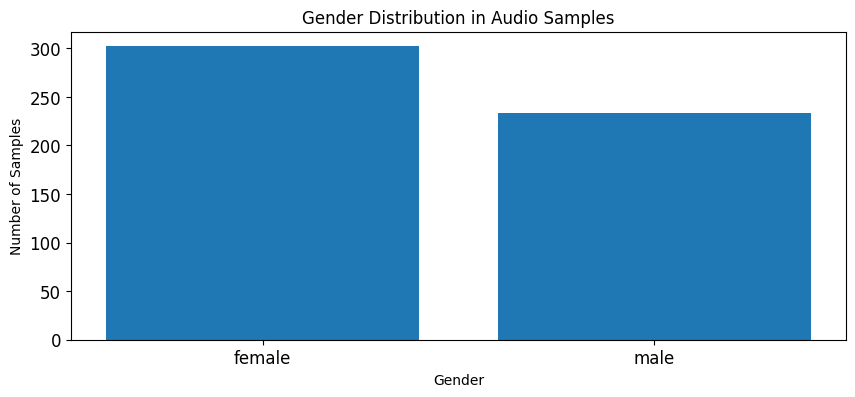

In [192]:
# Calculate unique genders and their counts
gender_list, gender_count = np.unique(gender_emodb, return_counts=True)

# Plot gender distribution
plt.figure(figsize=(10, 4))  # Adjusted figure size for clarity
plt.bar(x=range(len(gender_list)), height=gender_count)
plt.xticks(ticks=range(len(gender_list)), labels=gender_list, fontsize=12)
plt.xlabel('Gender')
plt.tick_params(labelsize=12)
plt.ylabel('Number of Samples')
plt.title('Gender Distribution in Audio Samples')
plt.show()

## Combining gender's data

### Vstack method

In [193]:
def combine_datasets_gender():

    # Vertically stack features from both datasets
    combined_features = np.vstack((features_ravdess, features_emodb))
    # Concatenate gender data from both datasets
    combined_genders = np.concatenate((gender_ravdess, gender_emodb))

    return combined_features, combined_genders

In [194]:
# Call the function to combine datasets
combined_features, combined_genders = combine_datasets_gender()

### Verify the vertical stacked data to ensure if it combined:

In [195]:
# Print shapes to verify
print(f'Combined features shape: {combined_features.shape}')
print(f'Combined genders shape: {combined_genders.shape}')

Combined features shape: (1972, 180)
Combined genders shape: (1972,)


### Print combined gender distributino in bar chart:

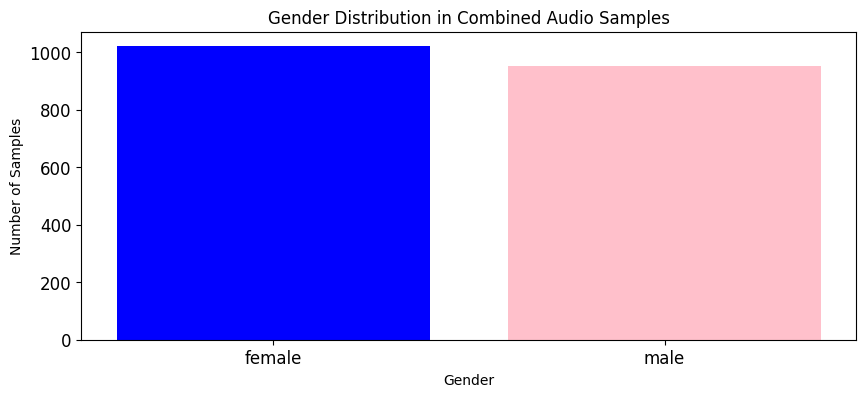

In [196]:
# Calculate unique genders and their counts in the combined dataset
gender_list, gender_count = np.unique(combined_genders, return_counts=True)

# Plot gender distribution for the combined dataset
plt.figure(figsize=(10, 4))  # Adjusted figure size for clarity
plt.bar(x=range(len(gender_list)), height=gender_count, color=['blue', 'pink'])  # Color coding for visual distinction
plt.xticks(ticks=range(len(gender_list)), labels=gender_list, fontsize=12)
plt.xlabel('Gender')
plt.tick_params(labelsize=12)
plt.ylabel('Number of Samples')
plt.title('Gender Distribution in Combined Audio Samples')
plt.show()

In the EmoDB dataset, gender distribution varies. There are about 70 fewer actors compared with females. Whereas in the RAVDESS dataset, the male and female distributions are even. In the combined dataset, this might lead to the consequence of inaccuracy when detecting male voices compared to females.

## Assignment 3